In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
np.random.seed(42)

부도비율 = pd.read_csv('../Step4-3_재무비율_워드임베딩_모델링//datasets/부도기사비율_재무비율.csv')
부도비율.rename(columns={'운전자산총자본비율':'운전자본비율'}, inplace=True)

감성분석 = pd.read_csv('../Step5-2_감성분석_모델링/datasets/부정기사비율_재무비율.csv')
감성분석.rename(columns={'운전자산총자본비율':'운전자본비율'}, inplace=True)

data = 부도비율
data['부정기사비율'] = 감성분석.부정기사비율
data

,회사명,회계년도,운전자본비율,이익잉여금총자산비율,총자산이익율,시장가부채비율,매출액회전율,부도기사비율,부실기업여부,부정기사비율
0,네이쳐글로벌,2009,74.492049,-49.803589,-3.371182,673.432622,6.028268,10.810811,1,29.333333
1,네프로아이티,2009,-0.465154,19.338150,13.884726,157.344363,76.780711,38.235294,1,29.807692
2,뉴젠아이씨티,2009,27.593677,-1075.333708,-28.342808,136.342262,40.747316,16.494845,1,24.242424
3,트루아워,2009,52.368738,-19.102365,-25.573719,412.297157,33.436299,46.341463,1,27.380952
4,디패션,2009,20.920391,-333.294194,-23.158301,170.052742,71.074703,30.000000,1,28.571429
...,...,...,...,...,...,...,...,...,...,...
265,지니뮤직,2016,45.063046,-14.623948,4.450491,262.390477,101.096537,4.761905,0,4.761905
266,대주전자재료,2016,-8.786573,9.737698,2.277756,170.648920,48.084200,0.000000,0,10.958904
267,크리스에프앤씨,2016,30.558431,46.651963,19.919396,213.287219,133.252743,15.789474,0,5.263158
268,앤디포스,2016,81.281282,35.275974,18.934118,1071.393920,79.493948,0.000000,0,8.771930


In [10]:
부도 = data[data['부실기업여부']==1]
정상 = data[data['부실기업여부']==0]

,회사명,회계년도,운전자본비율,이익잉여금총자산비율,총자산이익율,시장가부채비율,매출액회전율,부도기사비율,부실기업여부,부정기사비율
135,씨제이이엔엠,2009,2.814262,16.478879,5.636979,174.850643,60.803587,42.857143,0,14.285714
136,안랩,2009,47.466492,50.400744,8.359978,545.217948,56.939152,0.000000,0,60.000000
137,포스코아이씨티,2009,-23.174026,-25.121698,6.080191,123.482176,130.063586,3.703704,0,18.518519
138,네오위즈,2009,46.036067,20.646980,19.274236,386.954876,93.022027,0.000000,0,25.000000
139,젬백스&카엘,2009,23.314514,-0.883477,-8.765436,238.951956,12.507727,12.149533,0,12.149533
...,...,...,...,...,...,...,...,...,...,...
265,지니뮤직,2016,45.063046,-14.623948,4.450491,262.390477,101.096537,4.761905,0,4.761905
266,대주전자재료,2016,-8.786573,9.737698,2.277756,170.648920,48.084200,0.000000,0,10.958904
267,크리스에프앤씨,2016,30.558431,46.651963,19.919396,213.287219,133.252743,15.789474,0,5.263158
268,앤디포스,2016,81.281282,35.275974,18.934118,1071.393920,79.493948,0.000000,0,8.771930


In [11]:
부도.drop(["부실기업여부"], axis=1 ,inplace=True)
정상.drop(["부실기업여부"], axis=1 ,inplace=True)

In [12]:
부도

,회사명,회계년도,운전자본비율,이익잉여금총자산비율,총자산이익율,시장가부채비율,매출액회전율,부도기사비율,부정기사비율
0,네이쳐글로벌,2009,74.492049,-49.803589,-3.371182,673.432622,6.028268,10.810811,29.333333
1,네프로아이티,2009,-0.465154,19.338150,13.884726,157.344363,76.780711,38.235294,29.807692
2,뉴젠아이씨티,2009,27.593677,-1075.333708,-28.342808,136.342262,40.747316,16.494845,24.242424
3,트루아워,2009,52.368738,-19.102365,-25.573719,412.297157,33.436299,46.341463,27.380952
4,디패션,2009,20.920391,-333.294194,-23.158301,170.052742,71.074703,30.000000,28.571429
...,...,...,...,...,...,...,...,...,...
130,위너지스,2016,4.206434,-376.016367,-21.360033,105.778735,78.213923,15.384615,26.666667
131,위노바,2016,28.671608,-89.404580,-9.113157,487.272885,63.716291,15.789474,34.146341
132,트레이스,2016,3.857923,-35.621815,0.788938,238.537763,22.490823,1.724138,30.508475
133,레이젠,2016,-3.874133,-5.069385,-9.353084,190.706311,117.325339,8.333333,20.634921


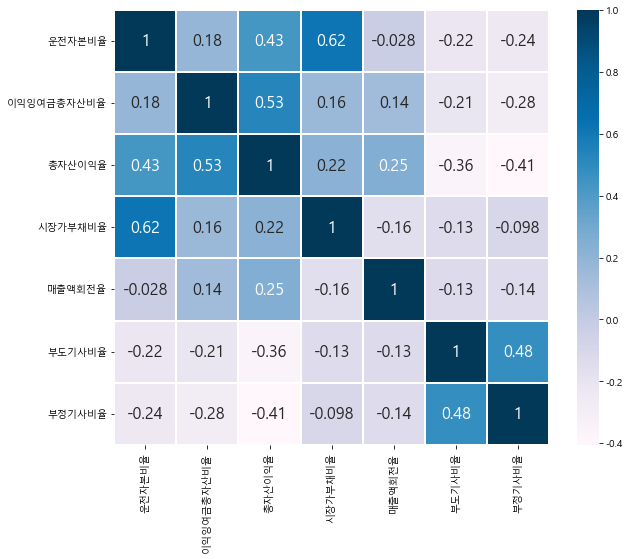

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# 한글 폰트 사용을 위해서 세팅
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
heatmap_data = data.drop(['회사명', '회계년도', '부실기업여부'], axis=1)

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Pearson Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

sns.set(font_scale=0.5)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [15]:
list=["운전자본비율","이익잉여금총자산비율","총자산이익율","시장가부채비율","매출액회전율","부도기사비율","부정기사비율"]
for i in list:
    정상평균=정상[i].mean().round(3)
    정상중앙값=정상[i].median().round(3)
    부도평균=부도[i].mean().round(3)
    부도중앙값=부도[i].median().round(3)
    print('정상평균:{0},정상중앙값:{1},부도평균:{2},부도중앙값:{3}'.format(정상평균,정상중앙값,부도평균,부도중앙값))

정상평균:22.31,정상중앙값:22.678,부도평균:3.101,부도중앙값:3.4
정상평균:21.233,정상중앙값:23.119,부도평균:-68.703,부도중앙값:-32.196
정상평균:7.463,정상중앙값:6.872,부도평균:-8.666,부도중앙값:-7.222
정상평균:361.679,정상중앙값:231.903,부도평균:244.7,부도중앙값:168.693
정상평균:87.379,정상중앙값:73.105,부도평균:68.307,부도중앙값:59.127
정상평균:7.646,정상중앙값:4.545,부도평균:21.382,부도중앙값:16.667
정상평균:13.883,정상중앙값:13.333,부도평균:29.712,부도중앙값:29.487


## t검정
부도기업과 정상기업은 운전자본비율, 이익잉여금총자산비율, 총자산이익율, 시장가부채비율, 매출액회전율 사이에 차이가 있을 것이다.    
귀무 가설: 운전자본비율, 이익잉여금총자산비율, 총자산이익율, 시장가부채비율, 매출액회전율에서 정상/부도 기업은 차이가 없다.    
대립 가설: 운전자본비율, 이익잉여금총자산비율, 총자산이익율,시장가부채비율, 매출액회전율에서 정상/부도 기업은 차이가 있다.    

유의수준=0.05  


### 등분산성  

귀무가설: 등분산이다.  
대립가설: 이분산이다.


1. 레빈의 검정 levene's test   
  정규성을 충족하지 않는 비모수 데이터에 대해 유용하게 사용할 수 있다. (편차 정의시 중앙을 median으로 설정 가능)2개 이상의 집단에서 활용가능하다.  

 
2. 바틀렛 검정 bartlett's test   
  정규성을 충족하는 데이터에 대해서 시행하게 되는 등분산 검정으로 2개 이상의 집단에서도 활용가능하다. (데이터 수가 달라도 가능)정규성을 충족하지 않는 비모수 데이터에 대해서는 levene 검정이 더 강건한 결과를 도출할 수 있다.  

 
3. 플리그너 검정 fligner's test     
  정규성을 충족하지 않는 비모수 데이터에 대해 유용하게 사용할 수 있다.(편차 정의시 중앙을 median으로 설정 가능)2개 이상의 집단에서 활용가능하다.Levene와 동일하나, 비모수 데이터에 더 강건하게 검정할 수 있는 방법이다.


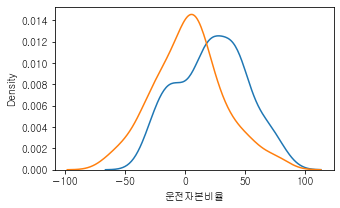

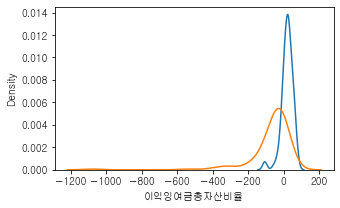

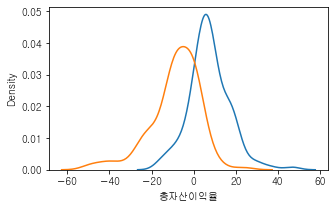

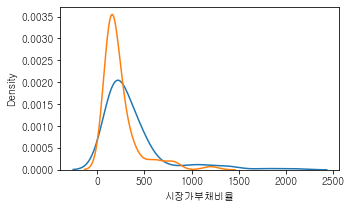

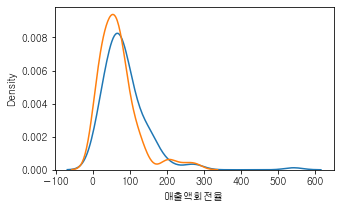

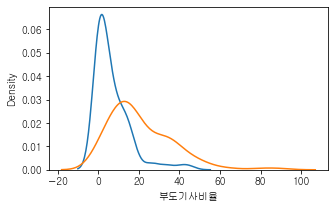

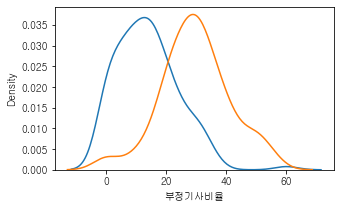

In [18]:
import seaborn as sns
list=["운전자본비율","이익잉여금총자산비율","총자산이익율","시장가부채비율","매출액회전율","부도기사비율","부정기사비율"]
for i in list:
    plt.rcParams['figure.figsize'] = [5, 3]

    sns.kdeplot(정상[i])
    sns.kdeplot(부도[i])

    plt.show()



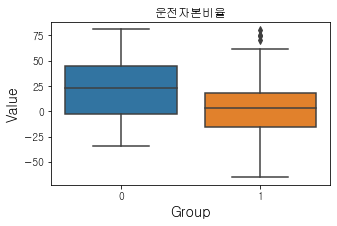

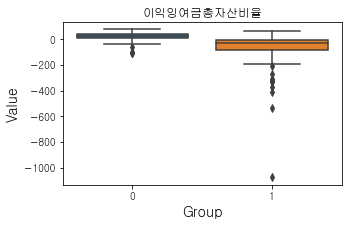

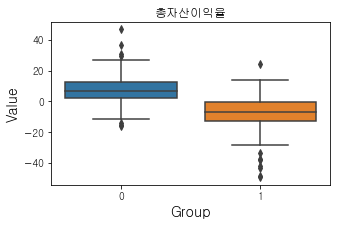

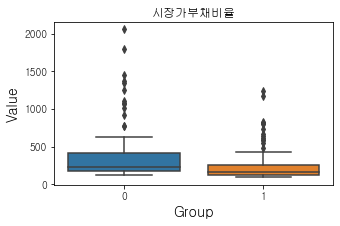

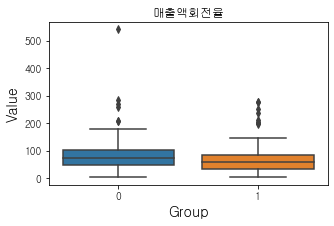

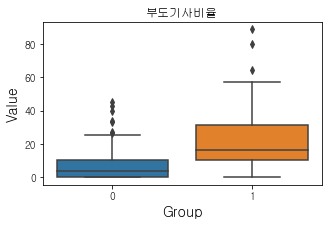

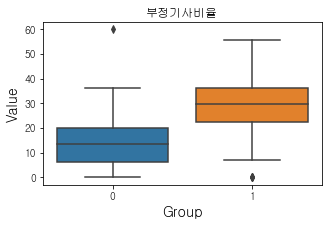

In [19]:
list=["운전자본비율","이익잉여금총자산비율","총자산이익율","시장가부채비율","매출액회전율","부도기사비율","부정기사비율"]
for i in list:
    all_ = [정상[i], 부도[i]]

    sns.boxplot(data=all_)
    plt.title(i)
    plt.xlabel("Group", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.show()


In [40]:
from scipy.stats import ttest_ind
from scipy import stats
list=["운전자본비율","이익잉여금총자산비율","총자산이익율","시장가부채비율","매출액회전율","부도기사비율","부정기사비율"]
for i in list:
    print(stats.levene(정상[i],부도[i], center = 'median'))
    print(stats.fligner(정상[i],부도[i]))
    print(stats.bartlett(정상[i],부도[i]))

# 귀무 : 정상 기업과 부도기업의 등분산이 같다 유의 수준 0.05보다 작다
# => 귀무가설 기각=>분산이 다르다=>이분산이다.

# 0.05보다 크다 등분산: 운전자본비율, 매출액 회전율, 총자산이익율(L,F:등, B:이), 부정기사비율
# 0.05보다 작다 이분산: 이익잉여금총자산비율, 시장가부채비율, 부도기사비율



LeveneResult(statistic=0.17426080955996479, pvalue=0.6766867456647296)
FlignerResult(statistic=0.0507338943383491, pvalue=0.8217911284336836)
BartlettResult(statistic=0.09802028508664444, pvalue=0.7542184291507769)
LeveneResult(statistic=17.677799252100176, pvalue=3.5697176088019024e-05)
FlignerResult(statistic=35.723174133882324, pvalue=2.2744232069282294e-09)
BartlettResult(statistic=200.30640986678114, pvalue=1.790468383228736e-45)
LeveneResult(statistic=3.0047392347022477, pvalue=0.08417147623047667)
FlignerResult(statistic=2.9226221422591707, pvalue=0.08734581996053095)
BartlettResult(statistic=5.471116005175303, pvalue=0.01933327621583437)
LeveneResult(statistic=6.594093904554098, pvalue=0.010774353807954218)
FlignerResult(statistic=16.622470714118325, pvalue=4.56074649774532e-05)
BartlettResult(statistic=31.94283792987726, pvalue=1.5877670701988847e-08)
LeveneResult(statistic=0.8576830482526624, pvalue=0.35522109451732065)
FlignerResult(statistic=0.9966896917543421, pvalue=0.318

p-value가 0.05보다 작을 경우 귀무가설:등분산성을 만족한다 기각!   
0.05보다 작다 등분산성 만족 못함! 이익잉여금,시장가부채,부도기사비율  
0.05보다 커서 등분산성이 있다 운전자본비율, 총자산이익율,매출액회전율, 부정기사비율

## 이분산 데이터 분포표

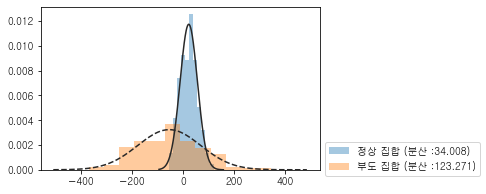

In [22]:
import scipy as sp

# 이분산을 가지는 두 데이터 조건 형성
mu_1=정상["이익잉여금총자산비율"].mean()
mu_2=부도["이익잉여금총자산비율"].mean()

sigma_1=np.std(정상["이익잉여금총자산비율"])
sigma_2=np.std(부도["이익잉여금총자산비율"])


# 랜덤데이터 형성 (정규분포)

x1 = sp.stats.norm(mu_1, sigma_1).rvs(135)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(135)

# 시각화
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"정상 집합 (분산 :{np.round(x1.std(),3)})")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"부도 집합 (분산 :{np.round(x2.std(),3)})")
ax.lines[1].set_linestyle('--')
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()


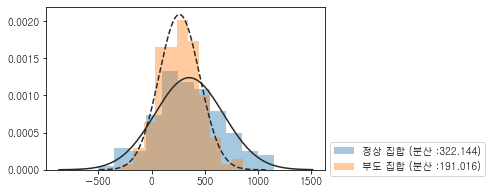

In [20]:

# 이분산을 가지는 두 데이터 조건 형성
mu_1=정상["시장가부채비율"].mean()
mu_2=부도["시장가부채비율"].mean()

sigma_1=np.std(정상["시장가부채비율"])
sigma_2=np.std(부도["시장가부채비율"])


# 랜덤데이터 형성 (정규분포)

x1 = sp.stats.norm(mu_1, sigma_1).rvs(135)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(135)

# 시각화
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"정상 집합 (분산 :{np.round(x1.std(),3)})")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"부도 집합 (분산 :{np.round(x2.std(),3)})")
ax.lines[1].set_linestyle('--')
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

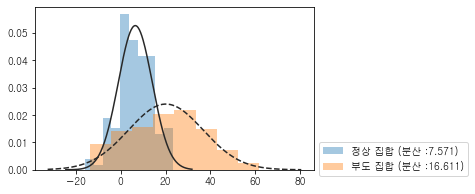

In [23]:
# 이분산을 가지는 두 데이터 조건 형성
mu_1=정상["부도기사비율"].mean()
mu_2=부도["부도기사비율"].mean()

sigma_1=np.std(정상["부도기사비율"])
sigma_2=np.std(부도["부도기사비율"])


# 랜덤데이터 형성 (정규분포)

x1 = sp.stats.norm(mu_1, sigma_1).rvs(135)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(135)

# 시각화
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"정상 집합 (분산 :{np.round(x1.std(),3)})")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"부도 집합 (분산 :{np.round(x2.std(),3)})")
ax.lines[1].set_linestyle('--')
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

### 이분산가정 t검정 : Welch's t-test

p-value가 0.05보다 작을 경우 귀무가설:등분산성을 만족한다 기각!   
0.05보다 작다 등분산성 만족 못함! 이익잉여금,시장가부채,부정기사비율  
0.05보다 커서 등분산성이 있다 운전자본비율, 총자산이익율,매출액회전율

In [28]:
#등분산을 만족하지 못하는 이익잉여금, 시장가 부채, 부정기사비율
이익 = stats.ttest_ind(정상["이익잉여금총자산비율"],부도["이익잉여금총자산비율"],equal_var=False) # default는 등분산, false이분산
print(이익.pvalue)
시부 = stats.ttest_ind(정상["시장가부채비율"],부도["시장가부채비율"],equal_var=False) # default는 등분산, false이분산
print(시부.pvalue)
부정 = stats.ttest_ind(정상["부정기사비율"],부도["부정기사비율"],equal_var=False) # default는 등분산, false이분산
print(시부.pvalue)

# 둘다 PVALUE값이 0.05 보다 작다 =>  차이가 있다.

4.653474920989594e-13
0.0005231540348121923
0.0005231540348121923


### 등분산 데이터 분포 확인

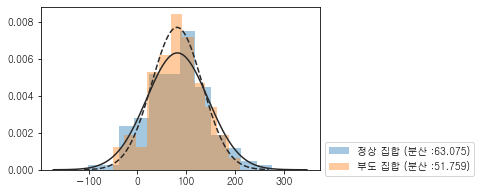

In [24]:
# 등분산을 가지는 두 데이터 조건 형성
mu_1=정상["매출액회전율"].mean()
mu_2=부도["매출액회전율"].mean()

sigma_1=np.std(정상["매출액회전율"])
sigma_2=np.std(부도["매출액회전율"])


# 랜덤데이터 형성 (정규분포)

x1 = sp.stats.norm(mu_1, sigma_1).rvs(135)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(135)

# 시각화
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"정상 집합 (분산 :{np.round(x1.std(),3)})")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"부도 집합 (분산 :{np.round(x2.std(),3)})")
ax.lines[1].set_linestyle('--')
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

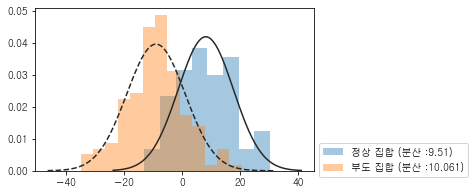

In [25]:
# 등분산을 가지는 두 데이터 조건 형성
mu_1=정상["총자산이익율"].mean()
mu_2=부도["총자산이익율"].mean()

sigma_1=np.std(정상["총자산이익율"])
sigma_2=np.std(부도["총자산이익율"])


# 랜덤데이터 형성 (정규분포)

x1 = sp.stats.norm(mu_1, sigma_1).rvs(135)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(135)

# 시각화
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"정상 집합 (분산 :{np.round(x1.std(),3)})")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"부도 집합 (분산 :{np.round(x2.std(),3)})")
ax.lines[1].set_linestyle('--')
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

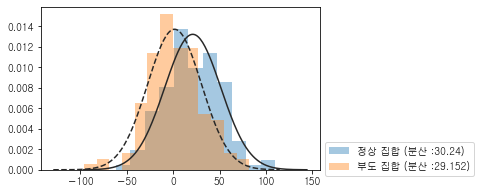

In [26]:
# 등분산을 가지는 두 데이터 조건 형성
mu_1=정상["운전자본비율"].mean()
mu_2=부도["운전자본비율"].mean()

sigma_1=np.std(정상["운전자본비율"])
sigma_2=np.std(부도["운전자본비율"])


# 랜덤데이터 형성 (정규분포)

x1 = sp.stats.norm(mu_1, sigma_1).rvs(135)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(135)

# 시각화
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"정상 집합 (분산 :{np.round(x1.std(),3)})")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"부도 집합 (분산 :{np.round(x2.std(),3)})")
ax.lines[1].set_linestyle('--')
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

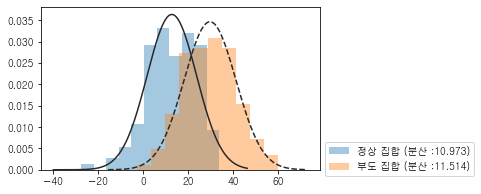

In [25]:
# 등분산을 가지는 두 데이터 조건 형성
mu_1=정상["부정기사비율"].mean()
mu_2=부도["부정기사비율"].mean()

sigma_1=np.std(정상["부정기사비율"])
sigma_2=np.std(부도["부정기사비율"])


# 랜덤데이터 형성 (정규분포)

x1 = sp.stats.norm(mu_1, sigma_1).rvs(135)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(135)

# 시각화
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"정상 집합 (분산 :{np.round(x1.std(),3)})")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label=f"부도 집합 (분산 :{np.round(x2.std(),3)})")
ax.lines[1].set_linestyle('--')
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

# 등분산성 만족 t-test

In [41]:
#등분산 만족하는 운전자본비율, 총자산이익율, 매출액회전율, 부정기사비율
운전 = stats.ttest_ind(정상["운전자본비율"],부도["운전자본비율"],equal_var=True) # default는 등분산, false이분산
print(운전.pvalue)
총자산 = stats.ttest_ind(정상["총자산이익율"],부도["총자산이익율"],equal_var=True) # default는 등분산, false이분산
print(총자산.pvalue)
매출액 = stats.ttest_ind(정상["매출액회전율"],부도["매출액회전율"],equal_var=True) # default는 등분산, false이분산
print(매출액.pvalue)
부정기사 = stats.ttest_ind(정상["부정기사비율"],부도["부정기사비율"],equal_var=True) # default는 등분산, false이분산
print(매출액.pvalue)

# 셋 다 PVALUE값이 0.05 보다 작다 =>  차이가 있다.

9.668424062411498e-08
1.4289200905078768e-27
0.008776461280382486
0.008776461280382486


In [26]:
list=["운전자본비율","이익잉여금총자산비율","총자산이익율","시장가부채비율","매출액회전율","부도기사비율","부정기사비율"]
for i in list:
    print(f'검정 통계치 : {np.round(ttest_ind(정상[i], 부도[i], equal_var = False)[0],3)}\n p값 : {ttest_ind(정상[i], 부도[i], equal_var = False)[1]}')
#p값이 0.05보다 작다. 따라서 귀무가설을 기각 !
# 따라서 모집단간 평균의 차이가 다르다 

검정 통계치 : 5.483
 p값 : 9.673966217966333e-08
검정 통계치 : 7.926
 p값 : 4.653474920989594e-13
검정 통계치 : 12.214
 p값 : 2.2626346809536933e-27
검정 통계치 : 3.52
 p값 : 0.0005231540348121923
검정 통계치 : 2.64
 p값 : 0.008796880646337669
검정 통계치 : -9.038
 p값 : 1.0782543590848794e-16
검정 통계치 : -12.0
 p값 : 8.74210151900044e-27
